In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [3]:
df.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [4]:
df.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


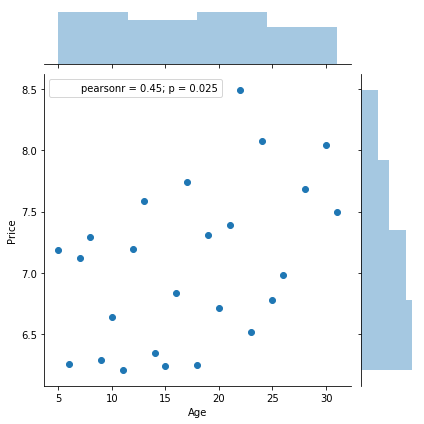

In [10]:
sns.jointplot('Age','Price',df)

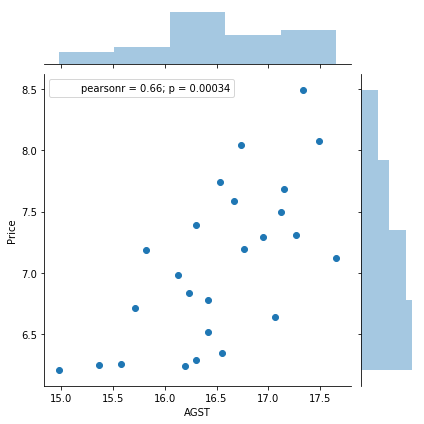

In [11]:
# Relation b/w AGST and Price
sns.jointplot('AGST','Price',df)

In [27]:
## chekcing for null values in columns
df1 = df[['AGST','Price']]
df1.Price.isnull().sum()

0

In [29]:
df1.shape

(25, 2)

In [44]:
X = df1[['AGST']]
y = df['Price']
y.head()

0    7.4950
1    8.0393
2    7.6858
3    6.9845
4    6.7772
Name: Price, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
df_test = pd.read_csv('wine_test.csv')
X_test = df_test[['AGST']]
y_test = df_test['Price']
y_test.head()

0    6.9541
1    6.4979
Name: Price, dtype: float64

In [63]:
pred = model.predict(X_test)

In [64]:
model.score(X_test,y_test)

0.31425999745119476

In [65]:
## Mean Square
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

0.03567878489401347

In [68]:
## Regression Analysis usig 2 variables 'AGST' and 'HarvestRain'
df2 = df[['AGST','HarvestRain','Price']]
df2.head()

,AGST,HarvestRain,Price
0,17.1167,160,7.4950
1,16.7333,80,8.0393
2,17.1500,130,7.6858
3,16.1333,110,6.9845
4,16.4167,187,6.7772


In [75]:
df2.corr()

,AGST,HarvestRain,Price
AGST,1.000000,-0.064496,0.659563
HarvestRain,-0.064496,1.000000,-0.563322
Price,0.659563,-0.563322,1.000000


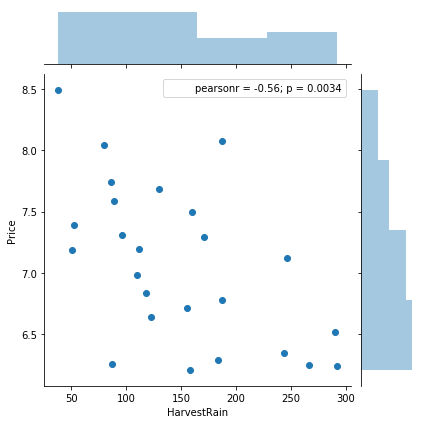

In [70]:
sns.jointplot('HarvestRain','Price',df2)

In [79]:
X_train= df2[['AGST','HarvestRain']]
y_train = df2['Price']
X_train.head()

,AGST,HarvestRain
0,17.1167,160
1,16.7333,80
2,17.1500,130
3,16.1333,110
4,16.4167,187


In [80]:
X_test = df_test[['AGST','HarvestRain']]
y_test = df_test['Price']
X_test.head()

,AGST,HarvestRain
0,16.1667,122
1,16.0000,74


In [81]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
pred = model.predict(X_test)

In [86]:
model.score(X_test,y_test)

-2.503338601329353

In [87]:
mean_squared_error(y_test,pred)

0.18227734112511235

In [94]:
# (AGST, HarvestRain, WinterRain, Age, FrancePop
X_train= df[['AGST','HarvestRain','WinterRain','Age','FrancePop']]
X_test = df_test[['AGST','HarvestRain','WinterRain','Age','FrancePop']]
y_train = df['Price']

In [95]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
pred = model.predict(X_test)

In [97]:
model.score(X_test,y_test)

0.2120671905595345

In [98]:
mean_squared_error(y_test,pred)

0.04099583678139189

In [100]:
# AGST, HarvestRain, WinterRain, Age
X_train= df[['AGST','HarvestRain','WinterRain','Age']]
X_test = df_test[['AGST','HarvestRain','WinterRain','Age']]
y_train = df['Price']

In [101]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
pred = model.predict(X_test)

In [103]:
model.score(X_test,y_test)

0.33439047027524404

In [104]:
mean_squared_error(y_test,pred)

0.03463140424386259

Model 4 has lowest mean square error till now

In [105]:
## Model 5
X_train= df[['AGST','HarvestRain','WinterRain']]
X_test = df_test[['AGST','HarvestRain','WinterRain']]
y_train = df['Price']

In [106]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
pred = model.predict(X_test)

In [108]:
model.score(X_test,y_test)

-1.3874955098859618

In [109]:
mean_squared_error(y_test,pred)

0.1242204602561182

As it can be seen that Model 4 ( with columns AGST, HarvestRain, WinterRain, Age) has lowest mean square error(0.0346
hence should be used for model prediction

In [110]:
?LinearRegression

Init signature: LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, optional, default 1
    The number of jobs to use for the computation.
    If -1 all CPUs